# Data Analysis

In [56]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Set a Seaborn color palette
sns.set_palette("viridis")

data = pd.read_excel("cocacola_data.xlsx")
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Beverage Brand,Days to \nDeliver,Delivery \nCompany,Price per \nUnit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,Walmart,1185732,2022-01-14,Northeast,New York,New York,Coca-Cola,25,USPS,0.50,12000,6000.0,3000.00,0.50
1,Walmart,1185732,2022-01-14,Northeast,New York,New York,Diet Coke,34,FedEx,0.50,10000,5000.0,1500.00,0.30
2,Walmart,1185732,2022-01-14,Northeast,New York,New York,Sprite,48,UPS,0.40,10000,4000.0,1400.00,0.35
3,Walmart,1185732,2022-01-14,Northeast,New York,New York,Fanta,20,USPS,0.45,8500,3825.0,1338.75,0.35
4,Walmart,1185732,2022-01-14,Northeast,New York,New York,Powerade,26,USPS,0.60,9000,5400.0,1620.00,0.30


In [57]:
data.shape

(3744, 14)

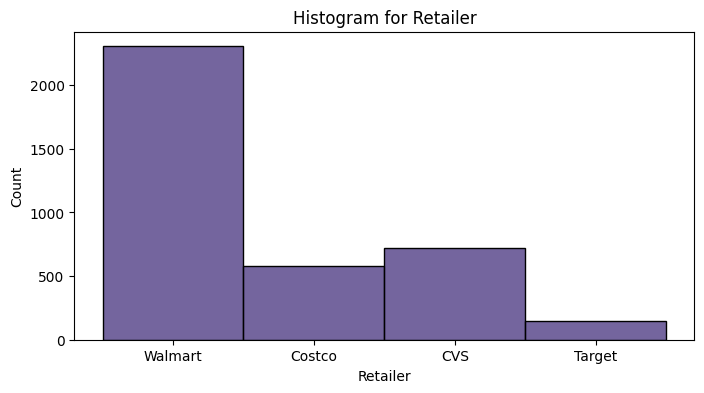

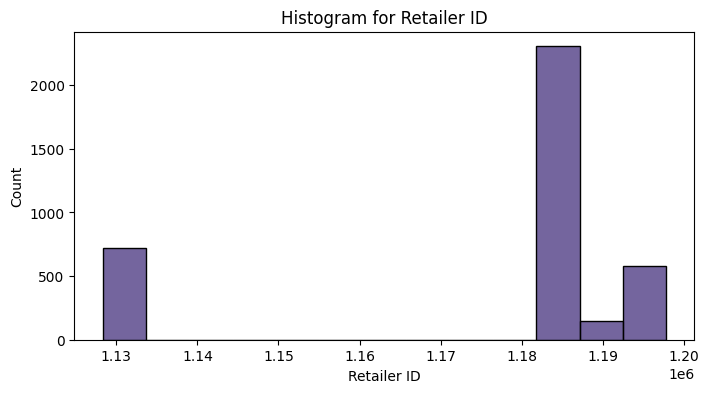

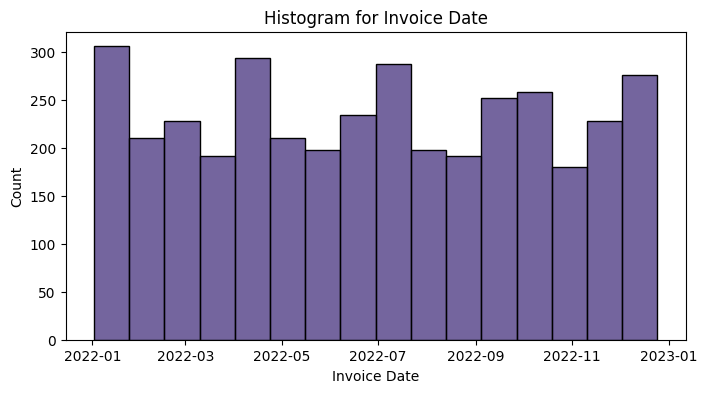

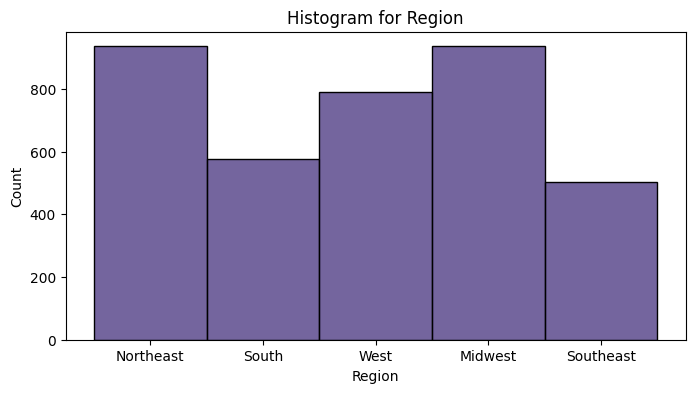

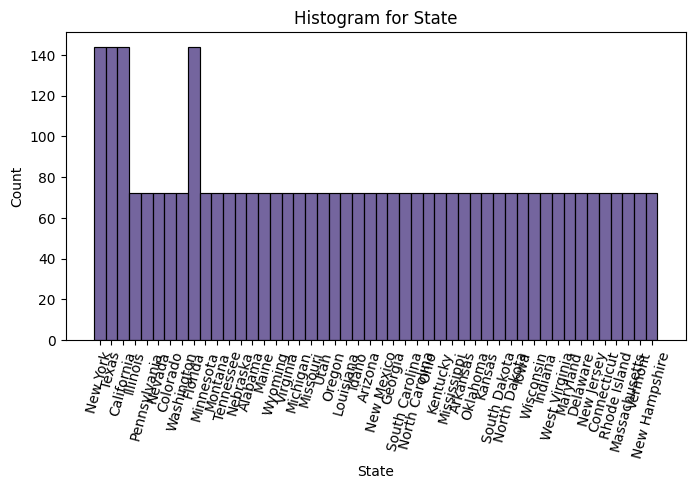

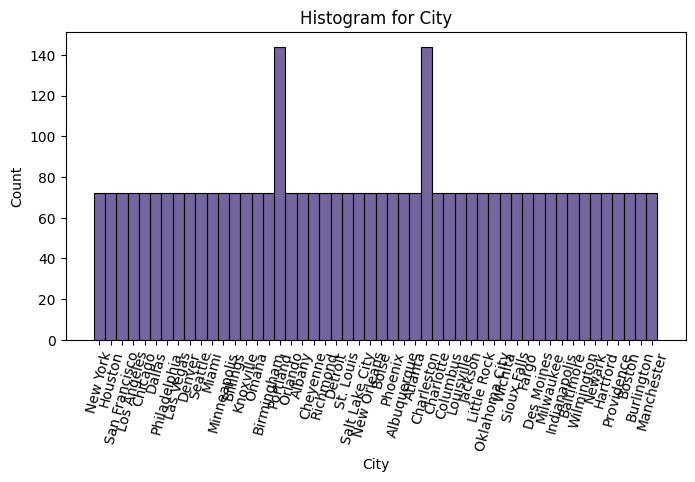

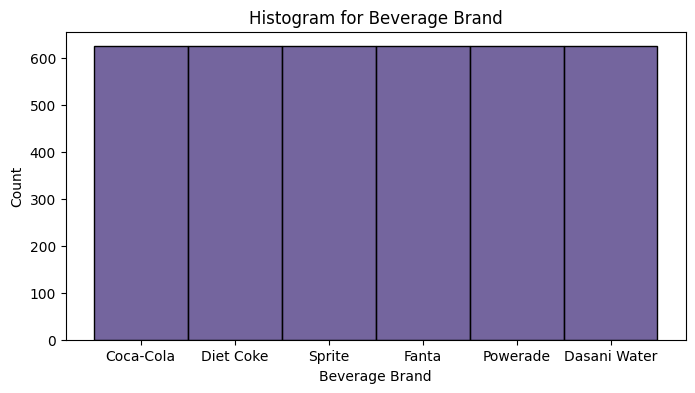

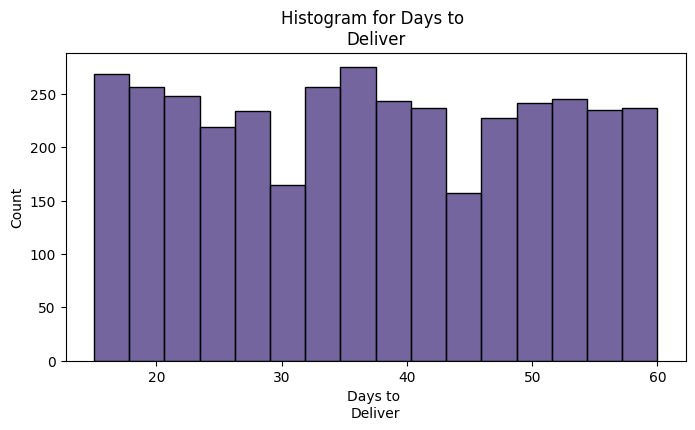

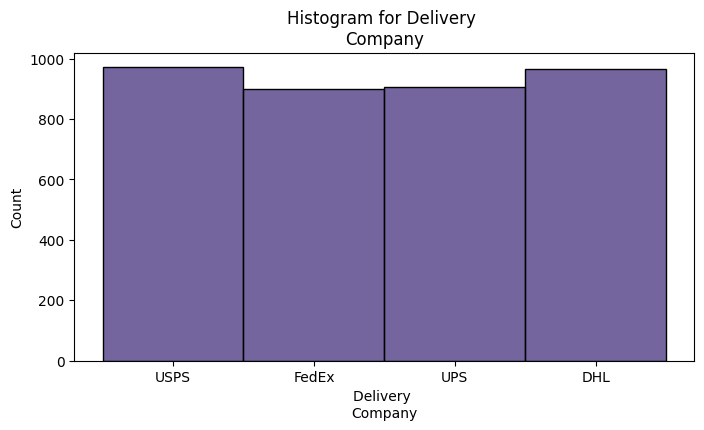

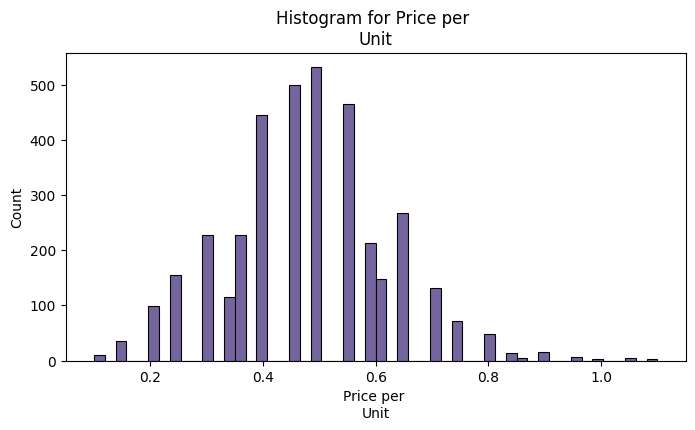

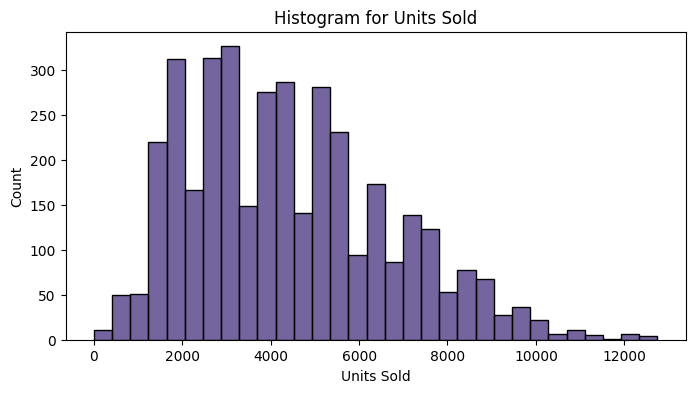

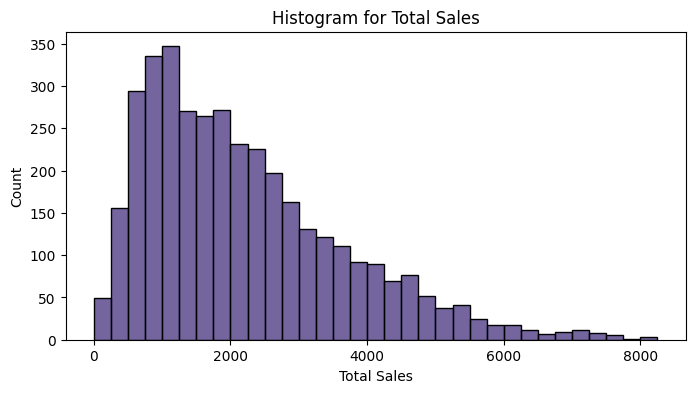

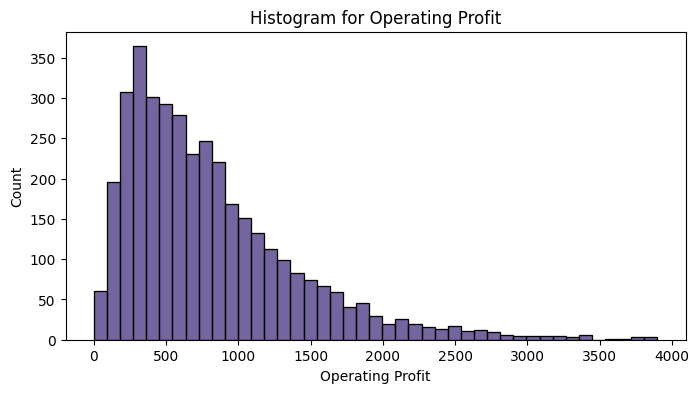

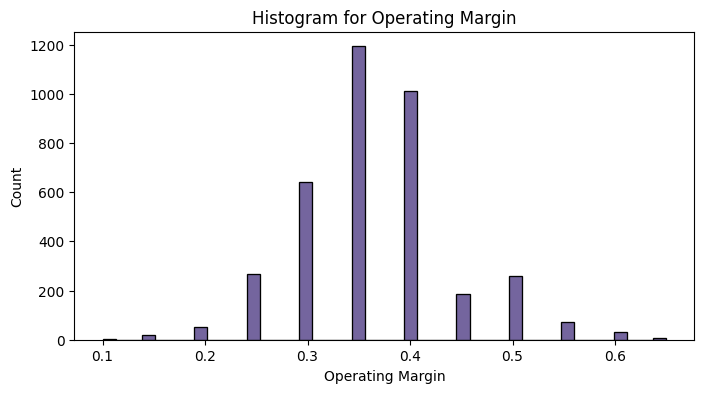

In [58]:
for col in data.columns:
    plt.figure(figsize=(8,4))
    plt.title(f"Histogram for {col}")
    if col in ["State", "City"]:
        plt.xticks(rotation=75)
    sns.histplot(data[col])

# Data Dimensionality

## Shape of the data

In [59]:
data.shape

(3744, 14)

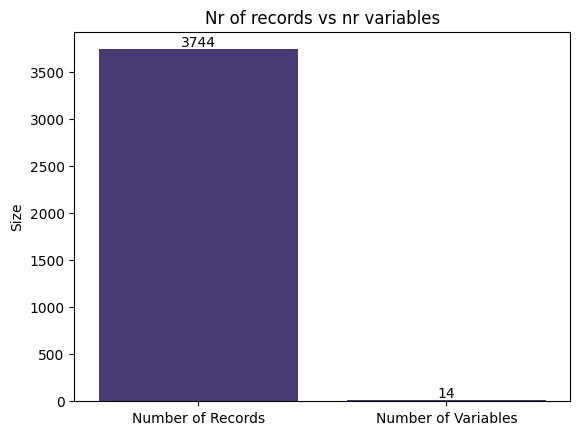

In [60]:
data_shape = data.shape

# Create a bar plot using Seaborn
plt.figure()
sns.barplot(x=["Number of Records", "Number of Variables"], y=data_shape)
plt.ylabel('Size')
plt.title('Nr of records vs nr variables')

# Add labels on top of the bars
for i, val in enumerate(data_shape):
    plt.text(i, val + 0.1, str(val), ha='center', va='bottom')

plt.show()

## Data type of variables

In [61]:
print(data.dtypes)

Retailer                      object
Retailer ID                    int64
Invoice Date          datetime64[ns]
Region                        object
State                         object
City                          object
Beverage Brand                object
Days to \nDeliver              int64
Delivery \nCompany            object
Price per \nUnit             float64
Units Sold                     int64
Total Sales                  float64
Operating Profit             float64
Operating Margin             float64
dtype: object


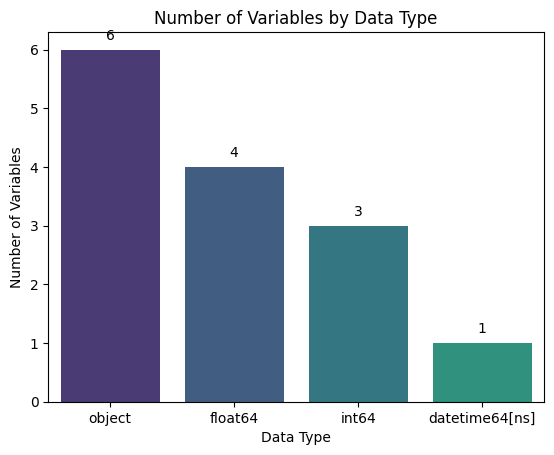

In [62]:

variables_by_type = data.dtypes.value_counts().reset_index()
variables_by_type.columns = ['Data Type', 'Number of Variables']

# Set a Seaborn color palette
sns.set_palette("viridis")

# Create a bar plot using Seaborn
plt.figure()
ax = sns.barplot(x='Data Type', y='Number of Variables', data=variables_by_type, hue='Data Type')
plt.title('Number of Variables by Data Type')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

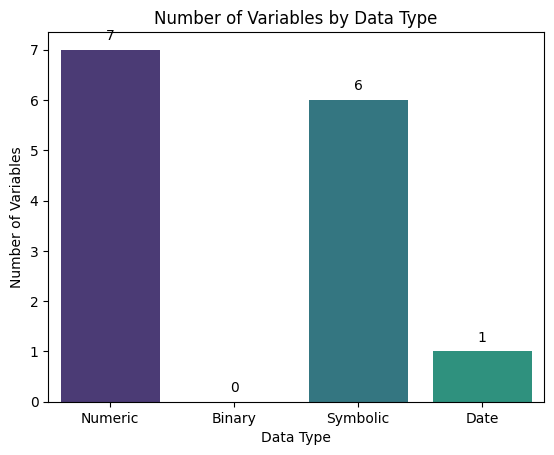

In [63]:
numeric_cols = data.select_dtypes(include='number').columns
binary_cols = data.select_dtypes(include='bool').columns
date_cols = data.select_dtypes(include='datetime').columns
symbolic_cols = data.select_dtypes(exclude=['number', 'bool', 'datetime']).columns

# Count variables by type
variables_by_type = pd.DataFrame({
    'Data Type': ['Numeric', 'Binary', 'Symbolic', 'Date'],
    'Number of Variables': [len(numeric_cols), len(binary_cols), len(symbolic_cols), len(date_cols)]
})

plt.figure()
ax = sns.barplot(x='Data Type', y='Number of Variables', data=variables_by_type, hue='Data Type')
plt.title('Number of Variables by Data Type')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [64]:
print("Numeric   ", numeric_cols.values)
print("\nBinary  ", binary_cols.values)
print("\nSymbolic", symbolic_cols.values)
print("\nDate    ", date_cols.values)

Numeric    ['Retailer ID' 'Days to \nDeliver' 'Price per \nUnit' 'Units Sold'
 'Total Sales' 'Operating Profit' 'Operating Margin']

Binary   []

Symbolic ['Retailer' 'Region' 'State' 'City' 'Beverage Brand' 'Delivery \nCompany']

Date     ['Invoice Date']


## Missing Values

In [65]:
data[data.columns].isnull().sum().sort_values(ascending=False)

Retailer              0
Retailer ID           0
Invoice Date          0
Region                0
State                 0
City                  0
Beverage Brand        0
Days to \nDeliver     0
Delivery \nCompany    0
Price per \nUnit      0
Units Sold            0
Total Sales           0
Operating Profit      0
Operating Margin      0
dtype: int64

In [66]:
missing_values = {}
for var in data.columns:
    n = data[var].isna().sum()
    if n > 0:
        missing_values[var] = n

if missing_values:
    data_df = pd.DataFrame(list(missing_values.items()), columns=['Category', 'Count'])

    plt.figure()
    ax = sns.barplot(x='Category', y='Count', data=data_df)
    plt.title('Bar Plot from Dictionary')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

else:
    print("No missing values")


No missing values


# Distribution

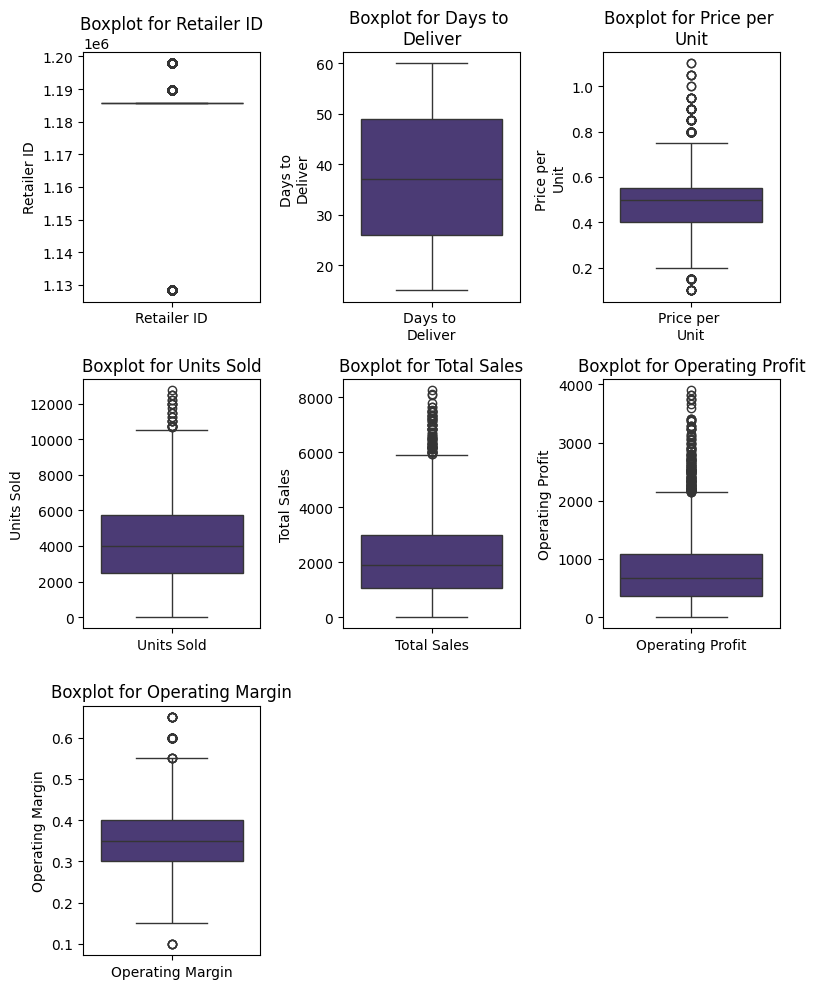

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

def define_grid(nr_vars, vars_per_row=3):
    nr_rows = nr_vars // vars_per_row + int(nr_vars % vars_per_row != 0)
    return nr_rows, vars_per_row

numeric_data = data.select_dtypes('number')
numeric_data_reset_index = numeric_data.reset_index(drop=True)

numeric = numeric_data_reset_index.columns.to_list()

if numeric:
    rows, cols = define_grid(len(numeric))
    fig, axs = plt.subplots(rows, cols, figsize=(8, 10), squeeze=False)

    for n, ax in zip(range(len(numeric)), axs.flatten()):
        sns.boxplot(x=[numeric[n]] * len(data), y=data[numeric[n]], ax=ax)
        ax.set_title(f'Boxplot for {numeric[n]}')

    # Hide any empty subplots
    for i in range(len(numeric), rows * cols):
        axs.flatten()[i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("There are no numeric variables.")

# Relation between variables

In [68]:
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Beverage Brand,Days to \nDeliver,Delivery \nCompany,Price per \nUnit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,Walmart,1185732,2022-01-14,Northeast,New York,New York,Coca-Cola,25,USPS,0.50,12000,6000.0,3000.00,0.50
1,Walmart,1185732,2022-01-14,Northeast,New York,New York,Diet Coke,34,FedEx,0.50,10000,5000.0,1500.00,0.30
2,Walmart,1185732,2022-01-14,Northeast,New York,New York,Sprite,48,UPS,0.40,10000,4000.0,1400.00,0.35
3,Walmart,1185732,2022-01-14,Northeast,New York,New York,Fanta,20,USPS,0.45,8500,3825.0,1338.75,0.35
4,Walmart,1185732,2022-01-14,Northeast,New York,New York,Powerade,26,USPS,0.60,9000,5400.0,1620.00,0.30


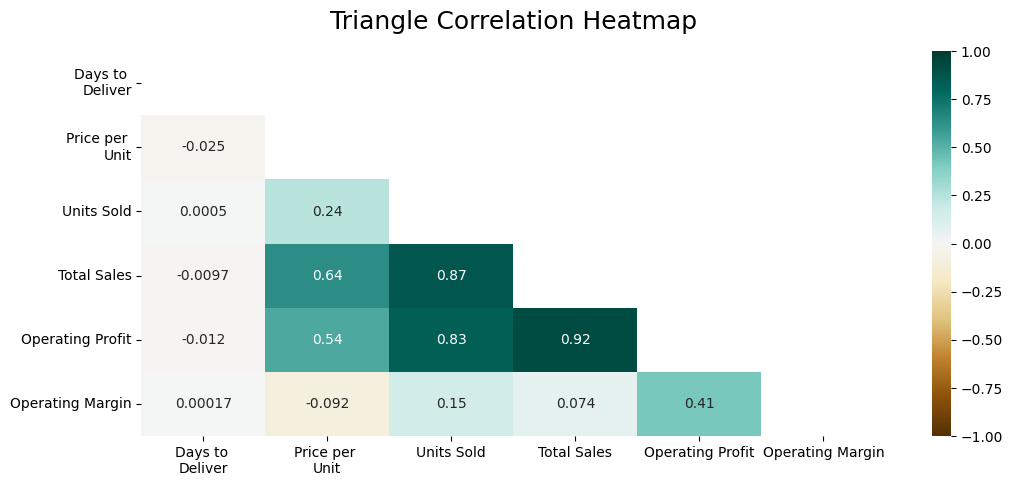

In [94]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data_no_ID = numeric_data.drop(columns=["Retailer ID"], inplace=False)
plt.figure(figsize=(12, 5))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(numeric_data_no_ID.corr(), dtype=np.bool_))
heatmap = sns.heatmap(numeric_data_no_ID.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.xticks(rotation=0)
plt.show()

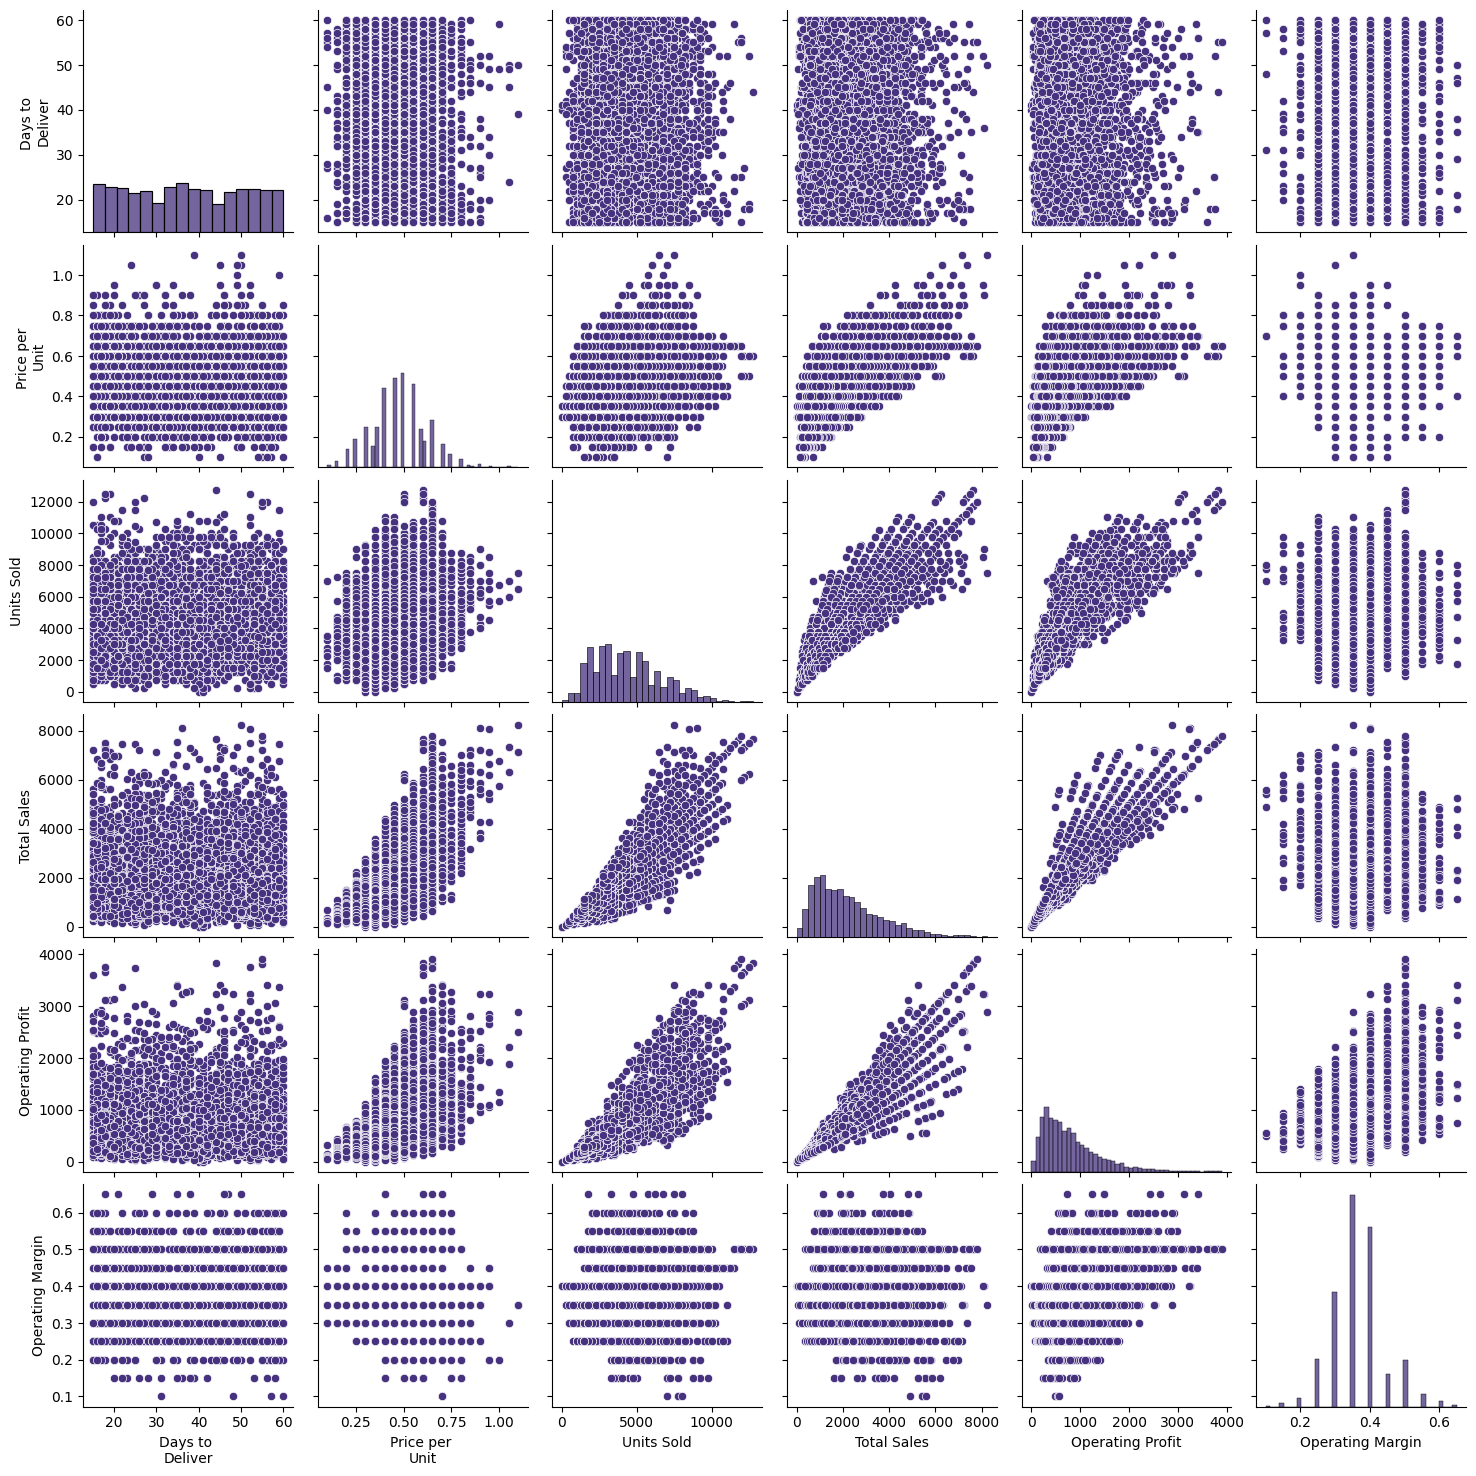

In [71]:
sns.pairplot(data=data.drop(columns=["Retailer ID"]))
plt.show()

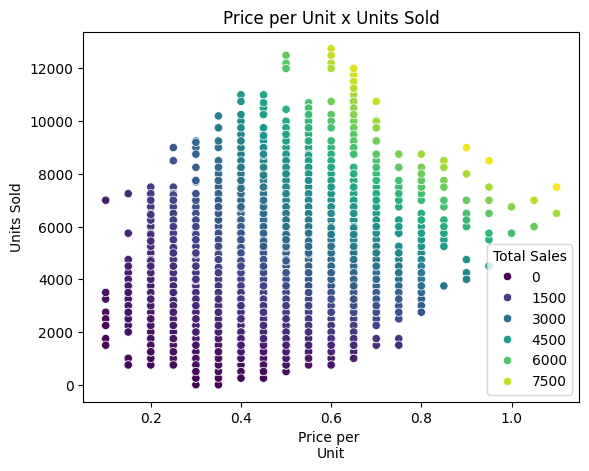

In [72]:

sns.scatterplot(x="Price per \nUnit", y="Units Sold",hue = "Total Sales", palette = "viridis", data=data)
plt.title("Price per Unit x Units Sold")
plt.show()

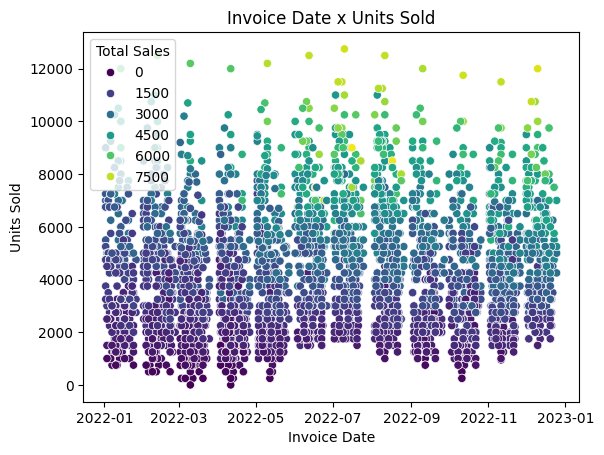

In [73]:
sns.scatterplot(x="Invoice Date", y="Units Sold",hue = "Total Sales", palette = "viridis", data=data)
plt.title("Invoice Date x Units Sold")
plt.show()

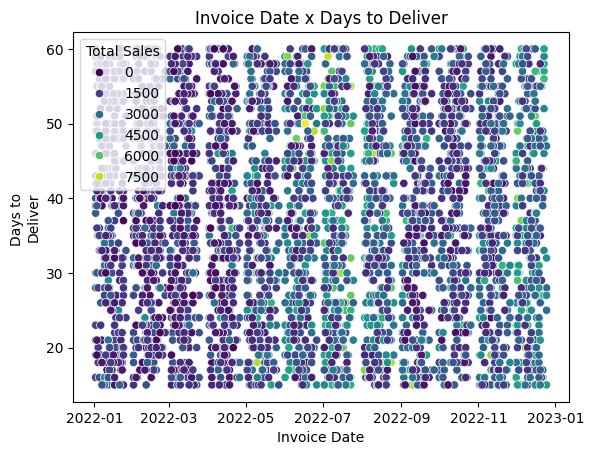

In [74]:
sns.scatterplot(x="Invoice Date", y="Days to \nDeliver",hue = "Total Sales", palette = "viridis", data=data)
plt.title("Invoice Date x Days to Deliver")
plt.show()

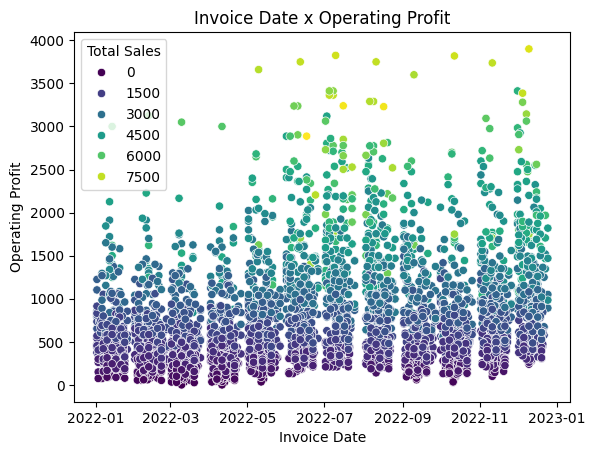

In [75]:
sns.scatterplot(x="Invoice Date", y="Operating Profit",hue = "Total Sales", palette = "viridis", data=data)
plt.title("Invoice Date x Operating Profit")
plt.show()

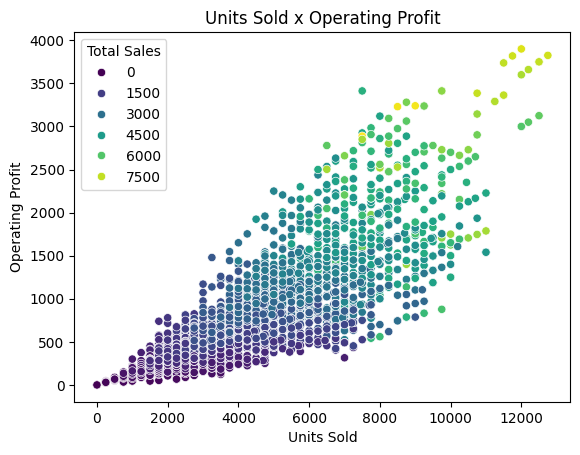

In [76]:
sns.scatterplot(x="Units Sold", y="Operating Profit",hue = "Total Sales", palette = "viridis", data=data)
plt.title("Units Sold x Operating Profit")
plt.show()

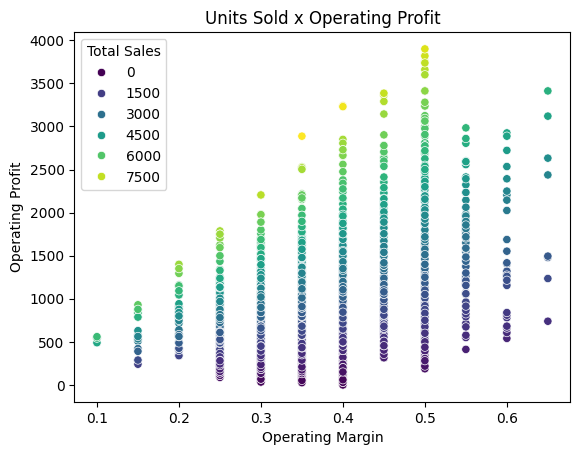

In [77]:
sns.scatterplot(x="Operating Margin", y="Operating Profit",hue = "Total Sales", palette = "viridis", data=data)
plt.title("Units Sold x Operating Profit")
plt.show()

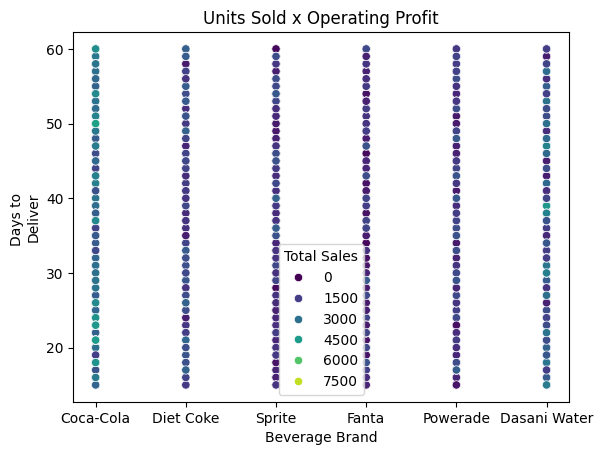

In [78]:
sns.scatterplot(x="Beverage Brand", y="Days to \nDeliver",hue = "Total Sales", palette = "viridis", data=data)
plt.title("Units Sold x Operating Profit")
plt.show()

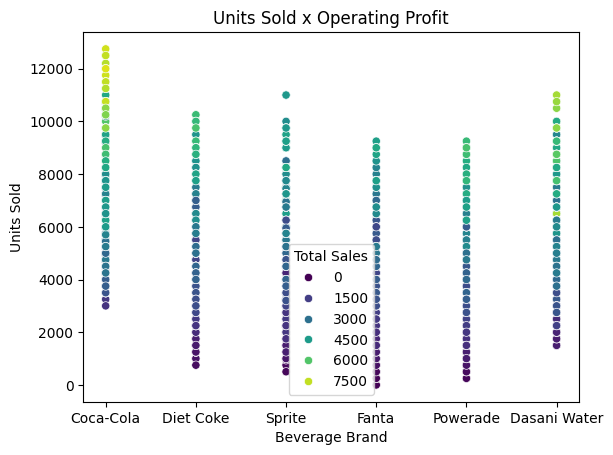

In [79]:
sns.scatterplot(x="Beverage Brand", y="Units Sold",hue = "Total Sales", palette = "viridis", data=data)
plt.title("Units Sold x Operating Profit")
plt.show()

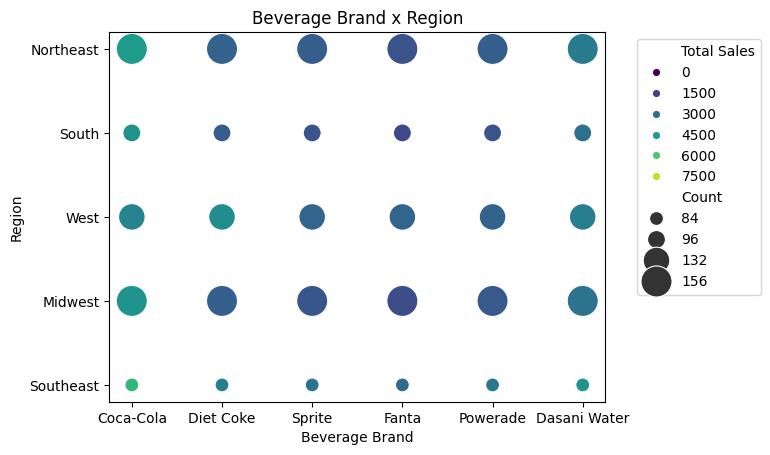

In [80]:
count_data = data.groupby(['Beverage Brand', 'Region']).size().reset_index(name='Count')
count_data = pd.merge(data, count_data, on=['Beverage Brand', 'Region'], how='left')

sns.scatterplot(x="Beverage Brand", y="Region", hue = "Total Sales", size="Count", palette = "viridis", sizes=(100, 500), data=count_data)
plt.title("Beverage Brand x Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

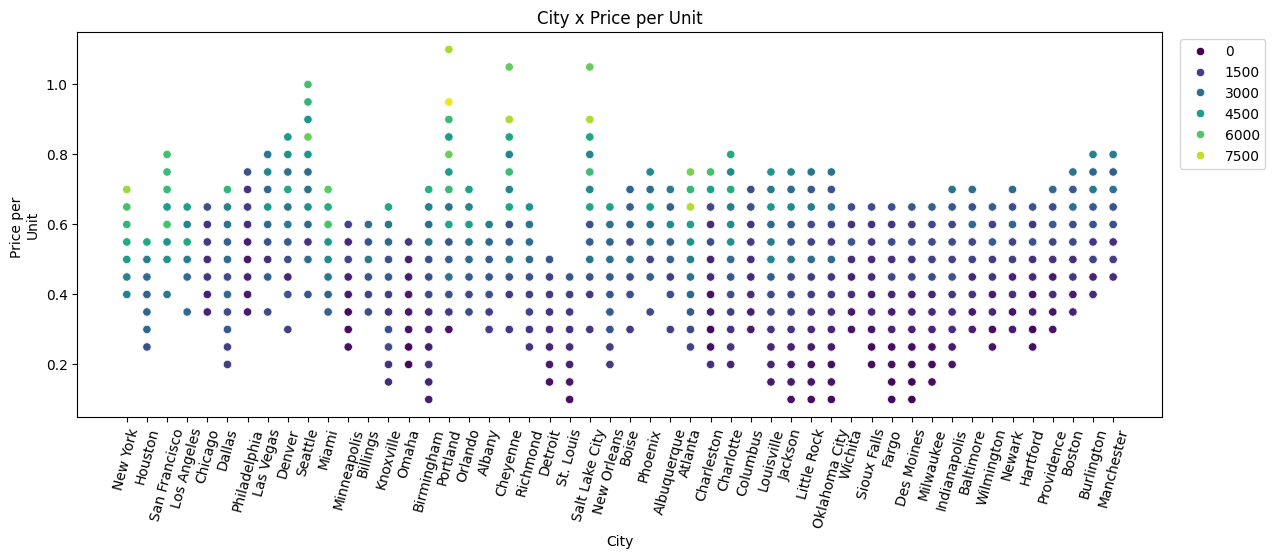

In [81]:
plt.figure(figsize = (14,5))
sns.scatterplot(x="City", y="Price per \nUnit",hue = "Total Sales", palette = "viridis", data=data)
plt.title("City x Price per Unit")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xticks(rotation=75)
plt.show()

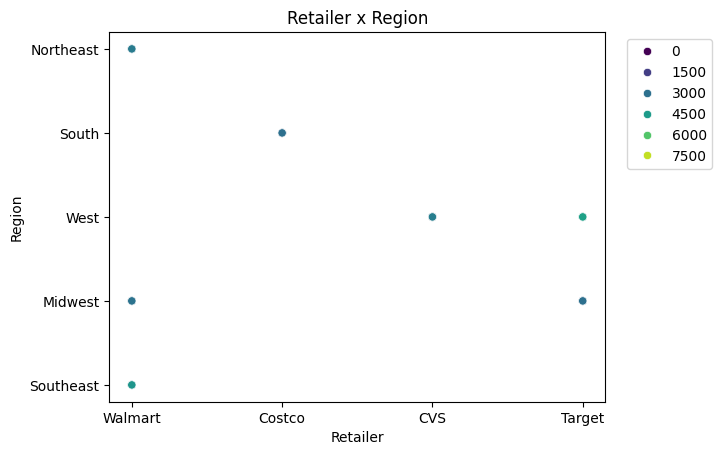

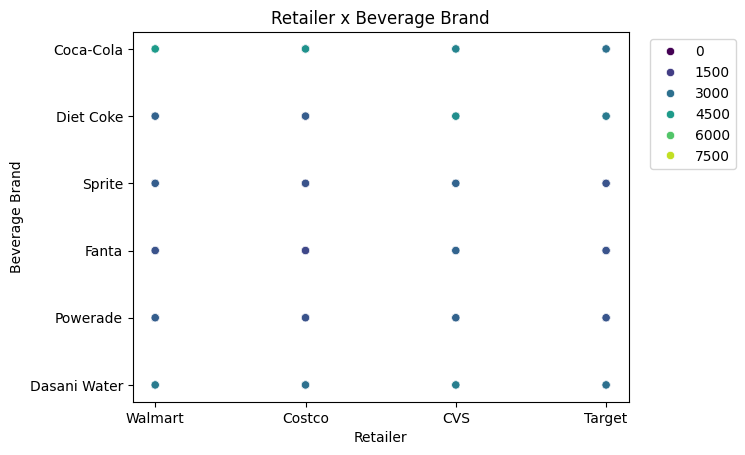

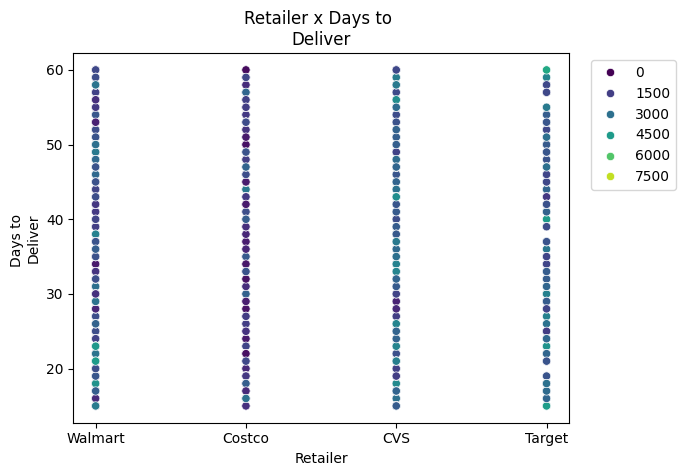

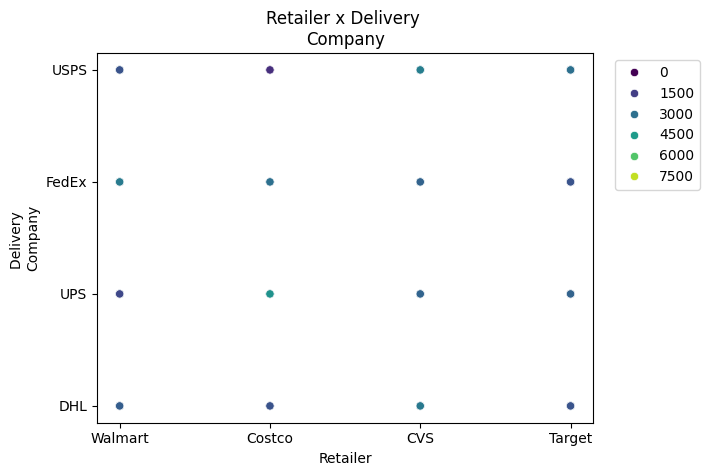

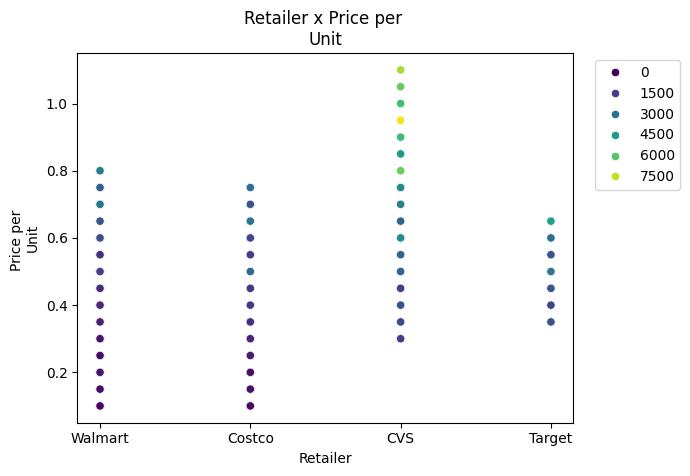

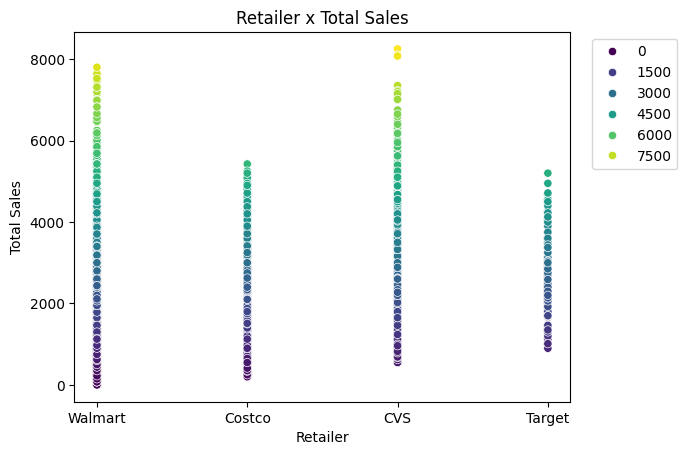

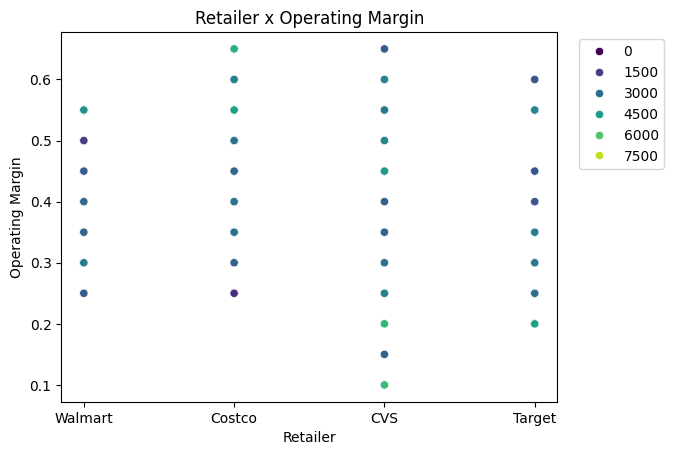

In [82]:
for col in ["Region", "Beverage Brand", "Days to \nDeliver", "Delivery \nCompany", "Price per \nUnit", "Total Sales", "Operating Margin"]:
    sns.scatterplot(x="Retailer", y=col, hue = "Total Sales", palette = "viridis", data=data)
    plt.title(f"Retailer x {col}")
    plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
    plt.show()